<h1 style="font-family:Robotto;"> <center>🏥 Hybrid Approach to Hospital Appointment Cancellation 🏥</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Mohammed Luqman Farhat Rumaiz - 2018130</center></p>

<p>
    Hey I am Luqman 👋, today we will be attempting to predict hospital appointment cancellations. The dataset used contains information about appointments for people who have a reservation at a hotel, and who may or may not show up for their scheduled booking. We will be using this data to identify patterns in which guests are more likely to cancel their appointments and to make predictions about which bookings are likely to be cancelled. By understanding these patterns, we can better manage our hotel operations and improve our customer service.  
<p>
Here is the <a src="https://www.kaggle.com/datasets/joniarroba/noshowappointments">🔗 Dataset </a>, it is from Brazil.

<b>Reference to Joni Hoppen and <a src="https://www.linkedin.com/company/aquare-la/">Aquarela Analytics</a></b>

<br>
<hr style="border: 1px solid green;">
<h3>Data Dictionary 📔 (As provided by the publisher of the Dataset)</h3>
<hr style="border: 1px solid green;">

<table style="border:border: 1px solid white; ">
    <tr>
        <th>PatientId</th>
        <th>AppointmentID</th>
        <th>Gender</th>
        <th>ScheduledDay</th>
        <th>AppointmentDay</th>
        <th>Age</th>
        <th>Neighbourhood</th>
        <th>Scholarship</th>
        <th>Hipertension</th>
        <th>Diabetes</th> 
        <th>Alcoholism</th>
        <th>Handcap</th>
        <th>SMS_received</th>
        <th>No-show</th>
    </tr>
    <tr>
        <td>Identification of a patient</td>
        <td>Identification of each appointment</td>
        <td>Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.</td>
        <td>The day of the actual appointment, when they have to visit the doctor.</td>
        <td>The day someone called or registered the appointment, this is before appointment of course.</td>
        <td>How old is the patient.</td>
        <td>Where the appointment takes place.</td>
        <td>True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia</td>
        <td>True or False</td>
        <td>True or False</td>
        <td>True or False</td>
        <td>True or False</td>
        <td>1 or more messages sent to the patient.</td>
        <td>True or False</td>
    </tr>
</table>

<h2 style="font-family:Robotto;">Data Wrangling 🧮</h2>
<br>

In [62]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
import klib
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [63]:
# Reading the dataset and showing the 1st 5 rows

df = pd.read_csv('dataset-noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [64]:
# Lets make the names of the columns more consistent in-terms of naming convention, also change it to make it 
# more understandable and also fix spelling issues

df.rename(columns={'SMS_received': 'SMSReceived', 'No-show': 'Cancelled', 'Handcap': 'Handicap'}, inplace=True)


# Amount of rows in the dataset

df.shape

(110527, 14)

In [65]:
# Checking for null values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
Cancelled         0
dtype: int64

In [66]:
# Trying to explore the dataset by seeing unique rows

for col in df.columns[2:]:
    print(col)
    print(df[col].unique())

Gender
['F' 'M']
ScheduledDay
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7 

The data looks great with no nulls. However a few odd values for ages that are below 0 appear, there are some very old people far above the average life expectancy in Brazil (76). Of course it can be a natural variation and we should not consider it as an outlier if so, lets get the average from 76 and the oldest indivual and lets check how many appointments are made for each.

In [67]:
print(df['Age'].max())
print(df[df['Age'] > 76]['Age'].median())

print('\n')
print(df[df['Age'] > 82].count())

115
82.0


PatientId         2026
AppointmentID     2026
Gender            2026
ScheduledDay      2026
AppointmentDay    2026
Age               2026
Neighbourhood     2026
Scholarship       2026
Hipertension      2026
Diabetes          2026
Alcoholism        2026
Handicap          2026
SMSReceived       2026
Cancelled         2026
dtype: int64


There are 2012 rows which aren't extremly low and I believe that is suggests that this are natural variations, lets just take ages over 95 to be outliers

In [68]:
print(df[df['Age'] > 95].count())

# Obviously ages cannot be below 0 and such fields are a clear data entry error

print(df[df['Age'] < 0].count())

PatientId         46
AppointmentID     46
Gender            46
ScheduledDay      46
AppointmentDay    46
Age               46
Neighbourhood     46
Scholarship       46
Hipertension      46
Diabetes          46
Alcoholism        46
Handicap          46
SMSReceived       46
Cancelled         46
dtype: int64
PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handicap          1
SMSReceived       1
Cancelled         1
dtype: int64


In [69]:
df['Age'] = np.where(df['Age'] < 0, 0, df['Age']) # Removing ages less than 0
df['Age'] = np.where(df['Age'] > 95, 95, df['Age']) # Removing ages over 95

df['Age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 94, 86, 91, 95, 92, 93], dtype=int64)

We need to now classify the dates given from the date of the appointment and the scheduled date, by calculating how long it took to the scheduled date since it was booked

In [70]:
# Firstly we remove the time to avoid any calculation errors, it is also irrelevant as we need the date. We convert
# the field into the DateTime type and access the date using dt.date

df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')

# Simply calculating the amount of days waited by substracting the day the appointment was set by the day it was scheduled

df['DaysWaited'] = (pd.to_datetime(df['AppointmentDate']) - pd.to_datetime(df['ScheduledDate'])).dt.days

# Accessing the day, month and year property for both AppointmentDate and ScheduledDate to be assigned to columns
df['AppointmentDay'] = df['AppointmentDate'].dt.day
df['AppointmentMonth'] = df['AppointmentDate'].dt.month
df['AppointmentYear'] = df['AppointmentDate'].dt.year

df['ScheduledDay'] = df['ScheduledDate'].dt.day
df['ScheduledMonth'] = df['ScheduledDate'].dt.month
df['ScheduledYear'] = df['ScheduledDate'].dt.year

In [71]:
# Checking for scenarios where the date the appointment is set behind the scheduled date, this is obviously an error

df[df['DaysWaited'] < 0].shape[0]

5

From above we can see that there are a few calculation mistakes done here, we can just get rid of those. For our dataset, for both the scheduled and appointment day we can consider it in terms of the year, month and day to see different patterns and correlations, but for now lets just take the number days waited.

In [72]:
print(df['ScheduledYear'].unique())
print(df['AppointmentYear'].unique())

[2016 2015]
[2016]


From the previously explored data, there weren't any constant features and now that we have taken the year out of the date for both scheduled and appointment dates, it can be seen that appointment dates in terms of the year is constant. Therefore we must remove it as it is not relevant for the model

In [73]:
# Dropping the constant feature - AppointmentYear and dropping columns that would clearly not help us in classification (Appointment and Scheduled Day can be useful but
# lets just look at the Days Waited for now)

df = df.drop(["PatientId", "AppointmentID", "ScheduledDate", "AppointmentDate", "AppointmentYear"], axis=1)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Cancelled,DaysWaited,AppointmentMonth,ScheduledMonth,ScheduledYear
0,F,29,29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,4,2016
1,M,29,29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,4,2016
2,F,29,29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,4,2016
3,F,29,29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4,2016
4,F,29,29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,3,7,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,6,5,2016
110523,F,3,7,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,6,5,2016
110524,F,27,7,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,6,4,2016
110525,F,27,7,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,6,4,2016


In [74]:
# Looking for duplicate rows

df[df.duplicated()].shape

(8071, 16)

Since this is a structured dataset, it is important to look at the duplicates since they can indicate frequency and distributions. It is important for our model to look at this.

https://indicodata.ai/blog/should-we-remove-duplicates-ask-slater/

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ["Gender", "Neighbourhood", "Cancelled"]

for col in cols:
    df[col] = le.fit_transform(df[col]).astype(np.int64)
    
    print(le.classes_)
    
df.head(10)

['F' 'M']
['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA LÚCIA' 'SANTA MARTHA' 'SA

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Cancelled,DaysWaited,AppointmentMonth,ScheduledMonth,ScheduledYear
0,0,29,29,62,39,0,1,0,0,0,0,0,0,4,4,2016
1,1,29,29,56,39,0,0,0,0,0,0,0,0,4,4,2016
2,0,29,29,62,45,0,0,0,0,0,0,0,0,4,4,2016
3,0,29,29,8,54,0,0,0,0,0,0,0,0,4,4,2016
4,0,29,29,56,39,0,1,1,0,0,0,0,0,4,4,2016
5,0,27,29,76,58,0,1,0,0,0,0,0,2,4,4,2016
6,0,27,29,23,25,0,0,0,0,0,0,1,2,4,4,2016
7,0,27,29,39,25,0,0,0,0,0,0,1,2,4,4,2016
8,0,29,29,21,1,0,0,0,0,0,0,0,0,4,4,2016
9,0,27,29,19,12,0,0,0,0,0,0,0,2,4,4,2016


In [76]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Cancelled,DaysWaited,AppointmentMonth,ScheduledMonth,ScheduledYear
0,0,29,29,62,39,0,1,0,0,0,0,0,0,4,4,2016
1,1,29,29,56,39,0,0,0,0,0,0,0,0,4,4,2016
2,0,29,29,62,45,0,0,0,0,0,0,0,0,4,4,2016
3,0,29,29,8,54,0,0,0,0,0,0,0,0,4,4,2016
4,0,29,29,56,39,0,1,1,0,0,0,0,0,4,4,2016


Now the dataset is cleaned lets analyse the data 👏

<h2 style="font-family:Robotto;">EDA (Explorary Data Analysis) 🧪</h2>
<br>

0    88208
1    22319
Name: Cancelled, dtype: int64

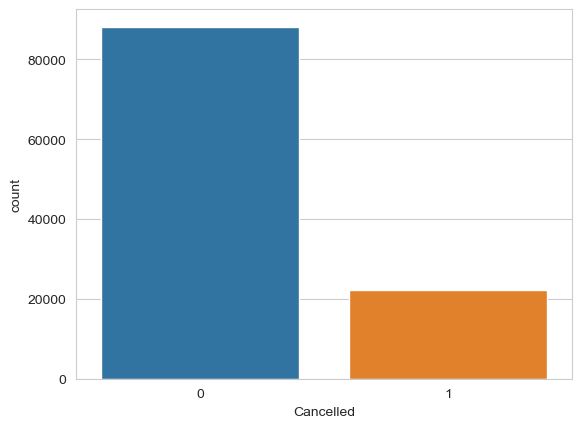

In [77]:
# Finding out the number of cancelled and not cancelled appointments

ax = sns.countplot(df["Cancelled"], label="Cancelled")
df["Cancelled"].value_counts()

I was unable to find direct statistics specific to Brazil, however from the below diagram we can see that just by looking at "Patient did not attend", the amount is maybe a quarter when compared to the rest. Therefore the above graph looks normal even though it is imbalanced, its due to a natural phenomenon.

<img src="https://factcheckni.org/wp-content/uploads/2019/03/FactCheckNI-064-Hospital-Appointments-Graph.png" width="500"/>

Source data graph: https://www.health-ni.gov.uk/publications/hospital-statistics-outpatient-activity-statistics-200910-201617

# DO EDA 😡

<h2 style="font-family:Robotto;">Pre-Processing 📜</h2>
<br>

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Saving feature names for later use
feature_list = list(df.columns)

# Splitting Data into Train and test

train_features, test_features, train_labels, test_labels=train_test_split(
    df.drop(['Cancelled'], axis=1),
    df[['Cancelled']],
    test_size=0.2,
    random_state=0)

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
import optuna   
import warnings

# Created the Xgboost specific DMatrix data format from the numpy array to optimise memory consumption
dtrain = xgb.DMatrix(x_train, label=y_train)
dvalid = xgb.DMatrix(x_valid, label=y_valid)

ModuleNotFoundError: No module named 'xgboost'

In [84]:
from sklearn.ensemble import RandomForestClassifier


# Training the Model

clf = RandomForestClassifier(n_estimators=100) # Creating a Gaussian Classifier

clf.fit(train_features, train_labels)

RandomForestClassifier()

In [85]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Testing the Model
y_pred=clf.predict(test_features)

# Checking Model Accuracy Score
metrics.accuracy_score(test_labels, y_pred)

0.7881570614312856